In [9]:
import numpy as np
import matplotlib.pyplot as plt
from kooplearn.kernel import KernelRidge
from kooplearn.utils import Flattener
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
flow=np.load("Re_769.npz")
X = flow['data']
geometry = np.load("input_geometry.npz")['mask']
def mask_img(img):
    masked_img = np.where(geometry, img, np.nan)
    return masked_img



In [10]:
flattener = Flattener()
scaler = StandardScaler()
data_pipe = Pipeline([("flattener", flattener), ("scaler", scaler)])
data_pipe.fit(X)

,steps,"[('flattener', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


In [11]:
model = KernelRidge(n_components=64, reduced_rank=False)

In [12]:
model.fit(data_pipe.transform(X))

,n_components,64
,lag_time,1
,reduced_rank,False
,kernel,'linear'
,gamma,None
,degree,3
,coef0,1
,kernel_params,None
,alpha,0.0
,eigen_solver,'auto'
,tol,0


In [13]:
model.modes(data_pipe.transform(X))

: 

In [7]:
u = data[..., 0]
v = data[..., 1]
p = data[..., 2]
x, y = np.meshgrid(np.linspace(0, 5, 1024), np.linspace(0, 1, 256))

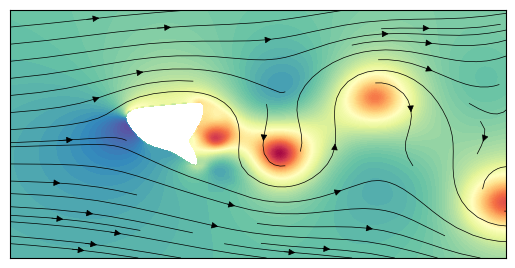

In [8]:
t_id = 50
subsample = 10
fig, ax = plt.subplots()

ax.set_aspect('equal')
pressure = ax.contourf(x, y, mask_img(p[t_id]), 100, cmap='Spectral')
ax.streamplot(x, y, u[t_id], v[t_id], color='black', linewidth=0.5)
ax.set_xlim(0, 2)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("flow.svg")